In [8]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [37]:
df = web.DataReader('OCGN', data_source='yahoo', start='2020-01-01', end='2021-04-28')

In [38]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,0.520,0.449,0.472,0.511,9503800,0.511
2020-01-03,0.569,0.480,0.490,0.539,7979900,0.539
2020-01-06,0.700,0.539,0.545,0.690,20322400,0.690
2020-01-07,0.690,0.590,0.680,0.637,9715500,0.637
2020-01-08,0.639,0.580,0.604,0.593,4841100,0.593
...,...,...,...,...,...,...
2021-04-22,9.550,6.580,6.710,9.290,231428300,9.290
2021-04-23,13.650,8.700,9.680,9.630,492180800,9.630
2021-04-26,12.600,10.780,11.060,11.590,270360000,11.590


In [39]:
# Get Number of Rows and Columns in the Data Set.
df.shape

(333, 6)

In [40]:
# Creating a new dataframe with only the Closing price at the end of the day.
data = df.filter(['Close'])

# Convert dataframe to a numpy array.
dataset = data.values

#get the number of rows to train the model on.
training_data_len = math.ceil(len(dataset)* .8)

training_data_len

267

In [41]:
# Scale the data to improve the model using the Min and Max Scaler method.
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# View scaled data
scaled_data

array([[2.01742010e-02],
       [2.19674632e-02],
       [3.16382727e-02],
       [2.82438848e-02],
       [2.54258991e-02],
       [3.03573722e-02],
       [2.74753422e-02],
       [2.45933123e-02],
       [2.58742166e-02],
       [3.00371470e-02],
       [3.20865901e-02],
       [3.40719851e-02],
       [3.16382727e-02],
       [3.27270404e-02],
       [3.21506344e-02],
       [3.03573722e-02],
       [2.53618549e-02],
       [2.77315231e-02],
       [2.52337625e-02],
       [2.17112862e-02],
       [2.13910572e-02],
       [2.07506070e-02],
       [2.27360058e-02],
       [2.22876921e-02],
       [2.17112862e-02],
       [2.01742010e-02],
       [2.33124118e-02],
       [2.63225302e-02],
       [2.38247735e-02],
       [2.33124118e-02],
       [2.36326369e-02],
       [2.20315113e-02],
       [2.17112862e-02],
       [2.20315113e-02],
       [2.05584742e-02],
       [2.01742010e-02],
       [1.71640825e-02],
       [1.41539641e-02],
       [1.37696947e-02],
       [1.62674514e-02],


In [42]:
# Creating the training data set.
# Create the scaled training data set.
train_data = scaled_data[0:training_data_len, :]

# Splitting the data into x_train and y_train data sets.

# x_train is the dependent variable.
x_train = []

# y_train is the independent variable.
y_train = []

# Appending x_train to the first 60 set of values in the data (0 to 59) and y_train to the rest which starts at position 61.
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.0201742 , 0.02196746, 0.03163827, 0.02824388, 0.0254259 ,
       0.03035737, 0.02747534, 0.02459331, 0.02587422, 0.03003715,
       0.03208659, 0.03407199, 0.03163827, 0.03272704, 0.03215063,
       0.03035737, 0.02536185, 0.02773152, 0.02523376, 0.02171129,
       0.02139106, 0.02075061, 0.02273601, 0.02228769, 0.02171129,
       0.0201742 , 0.02331241, 0.02632253, 0.02382477, 0.02331241,
       0.02363264, 0.02203151, 0.02171129, 0.02203151, 0.02055847,
       0.0201742 , 0.01716408, 0.01415396, 0.01376969, 0.01626745,
       0.01806071, 0.01863712, 0.01703599, 0.01850903, 0.0169079 ,
       0.01274497, 0.0130652 , 0.01056744, 0.00845395, 0.00704496,
       0.00409889, 0.00614833, 0.00505956, 0.00646855, 0.00704496,
       0.00589215, 0.00698092, 0.00691687, 0.00986294, 0.00666069])]
[0.0063404630024280935]

[array([0.0201742 , 0.02196746, 0.03163827, 0.02824388, 0.0254259 ,
       0.03035737, 0.02747534, 0.02459331, 0.02587422, 0.03003715,
       0.03208659, 0.03407199, 0.

In [43]:
# Convert the x_train and y_train to numpy arrays to be used for training the LSTM model.
x_train, y_train = np.array(x_train), np.array(y_train)

In [44]:
# Reshaping the x_train data set. LSTM model expects the data to be 3 Dimensional and it's currently 2 Dimensional so we have to convert it to 3 Dimensions.
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(207, 60, 1)

In [45]:
# Build the LSTM Model.
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
# Models architecture with 25 neurons.
model.add(Dense(25))

# Models architecture with 1 neuron.
model.add(Dense(1))

In [46]:
# Compiling the model.

# Used to improve upon the loss function. The loss function is used to measure how well the model did upon training.
model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
# Train the model with our data set.

# epochs is the number of iterations for a forward and backward neural network.
model.fit(x_train, y_train, batch_size=1, epochs=1)

207/207 [==============================] - 12s 34ms/step - loss: 8.1549e-04


In [48]:
# Creating the testing data set.
# Creating a new array containing scaled values from index 01/01/2021 to 04/29/2021.
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test.
x_test = []

# All of the values we want our data to predict.
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [49]:
# Converting the data into a numpy array to use in the LMSTO.
x_test = np.array(x_test)

In [50]:
# Reshape the data. x_test.shape[0] is the number of rows. x_test.shape[1] is the number of columns.
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [51]:
# Get the models predicted price values. We want the predictions to contain the same values as the y_test data set. 
# Predictions are made off of the x_test data set.
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [52]:
# Get the root mean squared error (RMSE). Measures how accurate the model predicts the response. The lower values mean it's a better fit.
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

# Note we got a 1.995, which is really good here. A value of 0 means the predictions were perfect so here it's close.

2.3569909966353215

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


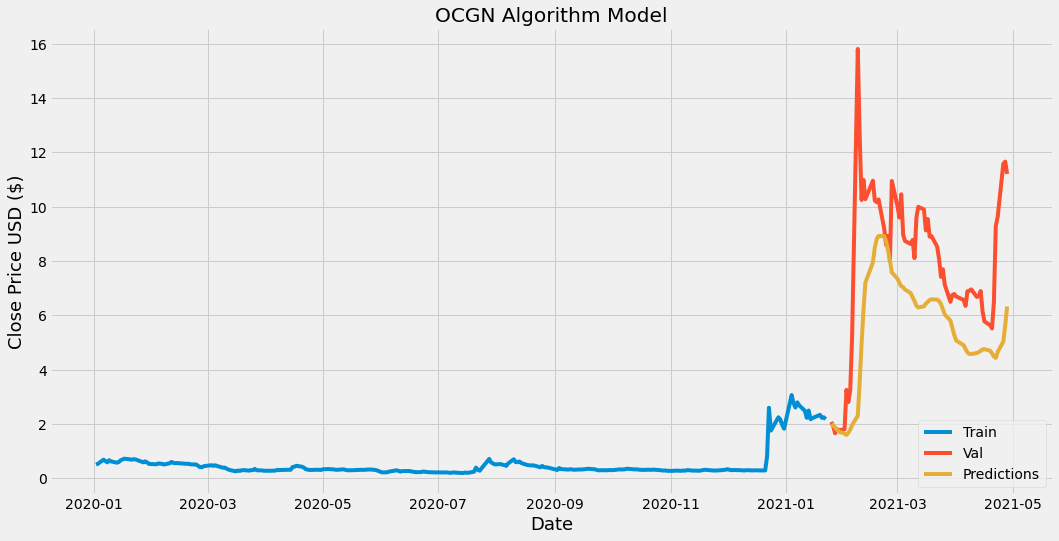

In [56]:
# Plot the data so we can visualize it.
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the models data.
plt.figure(figsize=(16,8))
plt.title('OCGN Algorithm Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])

# Displays the predicted price
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [57]:
# Showing the actual price and predicted prices.
valid

,Close,Predictions
Date,,
2021-01-25,2.08,2.003425
2021-01-26,1.92,1.942902
2021-01-27,1.66,1.876116
2021-01-28,1.82,1.791310
2021-01-29,1.77,1.716249
...,...,...
2021-04-22,9.29,4.438055
2021-04-23,9.63,4.653726
2021-04-26,11.59,5.039877


In [63]:
# Getting the quote.
ocgn_quote = web.DataReader('OCGN', data_source='yahoo', start='2020-01-01', end='2021-04-27')

# Creating a new dataframe.
new_df = ocgn_quote.filter(['Close'])

# Retrieve the last 60 day closing price values and convert the dataframe into an array.
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1. Not using fit transform because we want to use the same values as above.
last_60_days_scaled = scaler.transform(last_60_days)

# Creating an empty list.
X_test = []

# Append the last 60 days to the X_test list that were scaled to the data set.
X_test.append(last_60_days_scaled)

# Conver the X_test data set to a numpy array.
X_test = np.array(X_test)

# Reshape the data.
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scale price.
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[6.3294]]


In [64]:
# Getting the quote.
ocgn2 = web.DataReader('OCGN', data_source='yahoo', start='2020-04-28', end='2021-04-28')
print(ocgn2['Close'])

Date
2020-04-28     0.319
2020-04-29     0.317
2020-04-30     0.313
2020-05-01     0.336
2020-05-04     0.344
               ...  
2021-04-22     9.290
2021-04-23     9.630
2021-04-26    11.590
2021-04-27    11.660
2021-04-28    11.210
Name: Close, Length: 253, dtype: float64


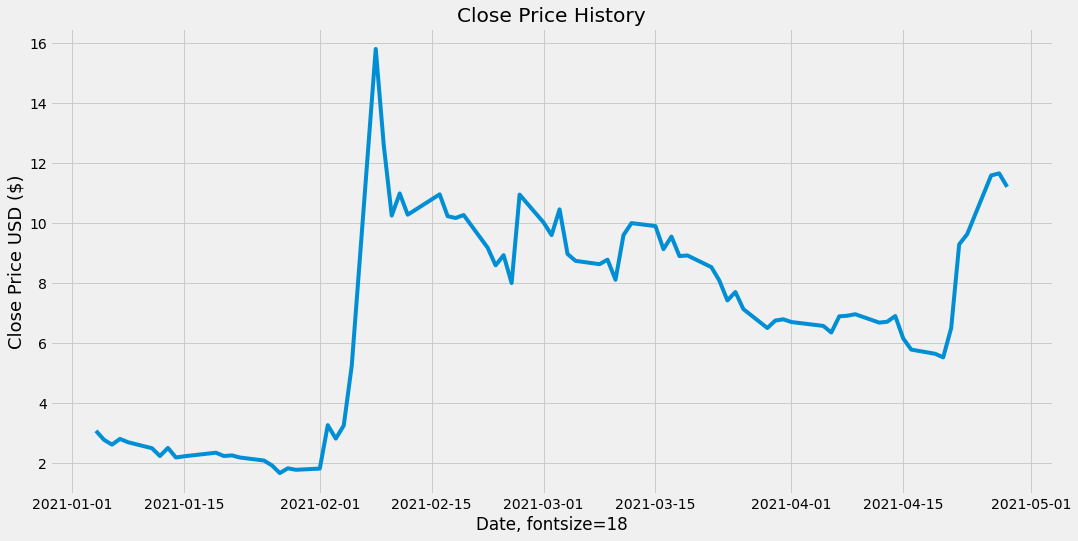

In [12]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date, fontsize=18')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()